https://medium.com/@romina.elena.mendez/transform-your-pandas-dataframes-styles-colors-and-emojis-bf938d6e98a2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import emoji

In [ ]:
!pip install emoji

In [ ]:
# Load sample data
df = pd.read_csv('https://raw.githubusercontent.com/hirogami/sample_data/main/sample_exam_replaced.csv')
df

,id,english,japanese,nationality,department,classes,gender
0,1,17.8,75.6,japan,literature,B,male
1,2,64.4,53.3,nepal,literature,B,male
2,3,86.7,31.1,nepal,literature,A,male
3,4,60.0,62.2,indonesia,literature,B,male
4,5,42.2,80.0,japan,literature,A,male
...,...,...,...,...,...,...,...
195,196,66.7,55.6,nepal,economics,B,male
196,197,44.4,80.0,china,economics,B,male
197,198,57.8,48.9,vietnam,economics,A,female
198,199,86.7,26.7,vietnam,economics,B,male


In [ ]:
# Group by nationality
df_nationality = df[['english', 'japanese', 'nationality']].groupby(by = 'nationality').mean().reset_index()
df_nationality

,nationality,english,japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
df_nationality.columns = ['nationality', 'score_english', 'score_japanese']
df_nationality

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Styling: Changing Background Color for Column Headers
headers = {
 'selector': 'th.col_heading',
 'props': 'background-color: #5E17EB; color: white;'
}
index_style = {
 'selector': 'th.index_name',
 'props': 'background-color: #5E17EB; color: white;'
}
tmp_pivot_style = (
    df_nationality
    .style
    .set_table_styles([headers,index_style])
    .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
)
tmp_pivot_style

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Highlight a cell
(
   df_nationality
   .style
   .set_table_styles([headers, index_style])
   .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
   .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[3, 'score_english'])
)

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Highlight max and min in two columns
# Select the columns that start with 'score_'
columns = df_nationality.columns[df_nationality.columns.str.startswith('score_')]
# Get the max and min values
max_value = df_nationality[columns].max().max()
min_value = df_nationality[columns].min().min()
# Set up max style
max_style = f'border: 4px solid #3BE8B0 !important;'
# Set up min style
min_style = f'background-color: #FF66C4; '

In [ ]:
# Create the table
(
 df_nationality
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': '#FD636B', 'color': 'white'}, subset=pd.IndexSlice[0, 'score_english'])
 .applymap(lambda x: max_style if x == max_value else '')
 .applymap(lambda x: min_style if x == min_value else '', subset=columns)
)

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


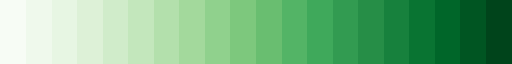

In [ ]:
# Color Background Gradients
# Show a color map
plt.get_cmap('Greens',lut=20)

In [ ]:
# Create a table with color background gradients
(
 df_nationality
 .style
 .set_table_styles([headers, index_style])
 .background_gradient(cmap='Greens',subset=columns)
 .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[2, 'nationality'])
)

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Color background in columns
(
 df_nationality
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#FFCFC9','color':'black'},subset=['nationality'])
 .set_properties(**{'background-color': '#FFF1B0','color':'black'},subset=['score_english', 'score_japanese'])
)

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Color Bar
(
 df_nationality
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': 'white','color':'black'},subset=columns)
 .bar(color='#FFCFC9',subset=['score_english'])
 .bar(color='#FFF1B0',subset=['score_japanese'])
)

,nationality,score_english,score_japanese
0,china,43.150000,72.050000
1,indonesia,51.100000,50.366667
2,japan,37.133333,68.325926
3,nepal,69.311538,45.811538
4,vietnam,45.833333,52.500000


In [ ]:
# Add a column of emoji codes
df_nationality_code = df_nationality.assign(code = [':China:', ':Indonesia:', ':Japan:', ':Nepal:', ':Vietnam:'])
df_nationality_code

,nationality,score_english,score_japanese,code
0,china,43.150000,72.050000,:China:
1,indonesia,51.100000,50.366667,:Indonesia:
2,japan,37.133333,68.325926,:Japan:
3,nepal,69.311538,45.811538,:Nepal:
4,vietnam,45.833333,52.500000,:Vietnam:


In [ ]:
# Add emojis
import emoji
df_nationality_code_flag = df_nationality_code.assign(flag = df_nationality_code['code'].apply(lambda x: emoji.emojize(x, variant="emoji_type")))

In [ ]:
# delete a column
df_nationality_code_flag_icon = df_nationality_code_flag[['nationality', 'score_english', 'score_japanese', 'flag']]
df_nationality_code_flag_icon

,nationality,score_english,score_japanese,flag
0,china,43.150000,72.050000,🇨🇳
1,indonesia,51.100000,50.366667,🇮🇩
2,japan,37.133333,68.325926,🇯🇵
3,nepal,69.311538,45.811538,🇳🇵
4,vietnam,45.833333,52.500000,🇻🇳


In [ ]:
# Create a table with color background gradients
(
 df_nationality_code_flag_icon
 .style
 .set_table_styles([headers, index_style])
 .background_gradient(cmap='Greens',subset=columns)
 .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[2, 'nationality'])
)

,nationality,score_english,score_japanese,flag
0,china,43.150000,72.050000,🇨🇳
1,indonesia,51.100000,50.366667,🇮🇩
2,japan,37.133333,68.325926,🇯🇵
3,nepal,69.311538,45.811538,🇳🇵
4,vietnam,45.833333,52.500000,🇻🇳


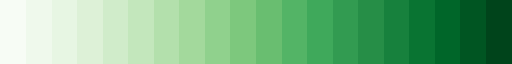

In [ ]:
plt.get_cmap('Greens',lut=20)

# Trial and error


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
# Deactivate pandas warning
warnings.filterwarnings('ignore')
print("Python Libraries version:")
print(' - '*20)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Python Libraries version:
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Pandas version:  1.5.3
Numpy version:  1.23.5
Matplotlib version:  3.7.1


In [ ]:
# Create a dataframe from a csv file
# You can download the file from the following link https://github.com/r0mymendez/pandas-styles
data =pd.read_csv('https://raw.githubusercontent.com/r0mymendez/pandas-styles/main/data/AppleStore.csv',sep=';')
data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [ ]:
# Pivot table
# filter the data to keep only the top 15 genres
top_genre = data.value_counts('prime_genre')[:15].index.tolist()
tmp = data.loc[data['prime_genre'].isin(top_genre),['prime_genre','user_rating','price']]
# create a new column with the rating rounded to the nearest integer
tmp['user_rating'] = [f'rating_{str(math.trunc(item))}' for item in tmp['user_rating']]
# create a pivot table
tmp_pivot = (
 pd.pivot_table(
 data = tmp,
 columns='user_rating',
 index='prime_genre',
 values='price',
 aggfunc='mean',
 fill_value=0
 ).reset_index().round(2)
)
# rename the columns
tmp_pivot.columns.name=''
# print the pivot table
tmp_pivot

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49,0.00,5.32,1.66,3.04,1.92
1,Education,3.42,1.79,1.95,2.32,5.20,3.12
2,Entertainment,0.51,1.99,0.78,0.90,0.95,1.03
3,Finance,0.30,0.00,0.00,0.73,0.53,0.50
4,Games,0.85,0.84,1.21,1.71,1.52,1.29
5,Health & Fitness,1.33,3.24,1.50,1.21,2.15,1.83
6,Lifestyle,0.29,1.27,0.81,0.90,1.08,1.37
7,Music,2.74,0.00,0.00,2.08,5.27,13.16
8,Photo & Video,0.75,0.74,1.36,2.16,1.47,1.33
9,Productivity,0.66,2.49,0.99,4.90,4.73,2.61


In [ ]:
# Styling: Changing Background Color for Column Headers
headers = {
 'selector': 'th.col_heading',
 'props': 'background-color: #5E17EB; color: white;'
}
index_style = {
 'selector': 'th.index_name',
 'props': 'background-color: #5E17EB; color: white;'
}
tmp_pivot_style = (
 tmp_pivot
 .style
 .set_table_styles([headers,index_style])
 .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
)
tmp_pivot_style

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
(
   tmp_pivot
   .style
   .set_table_styles([headers, index_style])
   .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
   .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[4, 'rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
# select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]
# get the max and min values
max_value = tmp_pivot[columns].max().max()
min_value = tmp_pivot[columns].min().min()
# Establecer el estilo para la celda con el valor máximo
max_style = f'border: 4px solid #3BE8B0 !important;'
# Establecer el estilo para la celda con el valor mínimo
min_style = f'background-color: #FF66C4; '
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': '#FD636B', 'color': 'white'}, subset=pd.IndexSlice[4, 'rating_5'])
 .applymap(lambda x: max_style if x == max_value else '')
 .applymap(lambda x: min_style if x == min_value else '', subset=columns)
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .background_gradient(cmap='viridis',subset=columns)
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#FFCFC9','color':'black'},subset=['rating_0','rating_1'])
 .set_properties(**{'background-color': '#FFF1B0','color':'black'},subset=['rating_2','rating_3'])
 .set_properties(**{'background-color': '#BEEAE5','color':'black'},subset=['rating_4','rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': 'white','color':'black'},subset=columns)
 .bar(color='#FFCFC9',subset=['rating_0','rating_1'])
 .bar(color='#FFF1B0',subset=['rating_2','rating_3'])
 .bar(color='#BEEAE5',subset=['rating_4','rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


In [ ]:
# create a function to add an image to the dataframe depending on the genre
def add_image(image_name):
 img_url = f"https://raw.githubusercontent.com/r0mymendez/pandas-styles/main/img/icons/img_{image_name}.png"
           # f"/content/img_{image_name}.png"
           # https://raw.githubusercontent.com/r0mymendez/pandas-styles/main/img/icons/img_0.png
           # https://github.com/r0mymendez/pandas-styles/blob/main/img/icons/img_0.png?raw=true
 width = "width: 8px"
 height = "height: 8px"
 text_align ="center"
 return f'{width};{height}; content: url({img_url}); text-align:{text_align}'

# apply the function to the dataframe
styled_df = (
 tmp_pivot
 .head(5)
 .reset_index()
 .rename({'index': 'genre'}, axis=1)
 .style.applymap(add_image, subset=pd.IndexSlice[:, ['genre']])
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
)

# display the dataframe with the images
display(styled_df)

,genre,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000


In [ ]:
def get_percentiles(row_data, bins=3, emoji='circle'):
    emoji_labels = {
        'circle': {3: ['🔴', '🟡', '🟢'],
                   4: ['🔴', '🟠', '🟡', '🟢']},
        'squad': {3: ['🟥', '🟨', '🟩'],
                  4: ['🟥', '🟨', '🟧', '🟩']}
    }

    if emoji in ['max', 'min', 'min_max']:
        return create_series(row_data, emoji)
    elif emoji in emoji_labels and bins in emoji_labels[emoji]:
        labels = emoji_labels[emoji][bins]
        return pd.cut(row_data, bins=len(labels), labels=labels, ordered=False)
    else:
        return row_data

def create_series(row_data, emoji):
    if emoji == 'max':
        return pd.Series(['🟩' if item == row_data.max() else '⬜' for item in row_data])
    elif emoji == 'min':
        return pd.Series(['🟥' if item == row_data.min() else '⬜' for item in row_data])
    elif emoji == 'min_max':
        return pd.Series(['🟥' if item == row_data.min() else '🟩' if item == row_data.max() else '⬜' for item in row_data])

def get_conditional_table_column(data, bins=3, emoji='circle'):
    tmp = data.copy()
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            row_data_emoji = get_percentiles(data[column], bins, emoji).astype(str)
            tmp[column] = data[column].astype(str) + ' ' + row_data_emoji
    return tmp

def get_conditional_table_row(data, bins=3, emoji='circle'):
    response_values = []
    column_str = [item for item in data.columns if data[item].dtypes not in ['int64', 'float64']]
    columns_num = [item for item in data.columns if data[item].dtypes in ['int64', 'float64']]

    for row in range(data.shape[0]):
        row_data = data.loc[row, columns_num]
        percentil = get_percentiles(row_data, bins, emoji)
        row_data = row_data.apply(lambda x: '{:.2f}'.format(x))
        percentil_values = [str(row_data[item]) + ' ' + percentil[item] for item in range(percentil.shape[0])]
        response_values.append(percentil_values)

    result_df = pd.DataFrame(response_values).round(2)
    result_df.columns = columns_num
    result_df = pd.concat([data[column_str], result_df], axis=1)
    return result_df



In [ ]:
# get conditional table by column with 3 bins
get_conditional_table_row(data=tmp_pivot,emoji='min_max')

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 ⬜,0.00 🟥,5.32 🟩,1.66 ⬜,3.04 ⬜,1.92 ⬜
1,Education,3.42 ⬜,1.79 🟥,1.95 ⬜,2.32 ⬜,5.20 🟩,3.12 ⬜
2,Entertainment,0.51 🟥,1.99 🟩,0.78 ⬜,0.90 ⬜,0.95 ⬜,1.03 ⬜
3,Finance,0.30 ⬜,0.00 🟥,0.00 🟥,0.73 🟩,0.53 ⬜,0.50 ⬜
4,Games,0.85 ⬜,0.84 🟥,1.21 ⬜,1.71 🟩,1.52 ⬜,1.29 ⬜
5,Health & Fitness,1.33 ⬜,3.24 🟩,1.50 ⬜,1.21 🟥,2.15 ⬜,1.83 ⬜
6,Lifestyle,0.29 🟥,1.27 ⬜,0.81 ⬜,0.90 ⬜,1.08 ⬜,1.37 🟩
7,Music,2.74 ⬜,0.00 🟥,0.00 🟥,2.08 ⬜,5.27 ⬜,13.16 🟩
8,Photo & Video,0.75 ⬜,0.74 🟥,1.36 ⬜,2.16 🟩,1.47 ⬜,1.33 ⬜
9,Productivity,0.66 🟥,2.49 ⬜,0.99 ⬜,4.90 🟩,4.73 ⬜,2.61 ⬜


In [ ]:
# get conditional table by column using the circle emoji with 4 bins
get_conditional_table_column(data=tmp_pivot,emoji='circle',bins=4)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 🔴,0.0 🔴,5.32 🟢,1.66 🟠,3.04 🟡,1.92 🔴
1,Education,3.42 🟢,1.79 🟡,1.95 🟠,2.32 🟠,5.2 🟢,3.12 🔴
2,Entertainment,0.51 🔴,1.99 🟡,0.78 🔴,0.9 🔴,0.95 🔴,1.03 🔴
3,Finance,0.3 🔴,0.0 🔴,0.0 🔴,0.73 🔴,0.53 🔴,0.5 🔴
4,Games,0.85 🔴,0.84 🟠,1.21 🔴,1.71 🟠,1.52 🟠,1.29 🔴
5,Health & Fitness,1.33 🟠,3.24 🟢,1.5 🟠,1.21 🔴,2.15 🟠,1.83 🔴
6,Lifestyle,0.29 🔴,1.27 🟠,0.81 🔴,0.9 🔴,1.08 🔴,1.37 🔴
7,Music,2.74 🟢,0.0 🔴,0.0 🔴,2.08 🟠,5.27 🟢,13.16 🟢
8,Photo & Video,0.75 🔴,0.74 🔴,1.36 🟠,2.16 🟠,1.47 🟠,1.33 🔴
9,Productivity,0.66 🔴,2.49 🟢,0.99 🔴,4.9 🟢,4.73 🟢,2.61 🔴
